# Project: Investigating TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen to analyse the TMDb movie dataset as I really like movies. It contains data about 10,000 movies, including review and revenue data (the columns ending with "adj" show the 2010 values adjusted for inflation).

I am curious to know if runtime is correlated with budget. I might also see which Chris Pratt movies brought in the most revenue, because who doesn't love Chris Pratt?

In [35]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [36]:
# Load data
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [37]:
# Let's see the type of each column and look for any weird data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Seems like there's some 0's in the budget and revenue that we have to be careful about. Year looks ok. Runtime 0 doesn't make much sense, I wonder what that means.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Most of the missing data seems to be in homepage, tagline, keywords and production companies, with some missing data in director, cast and production_companies. I will take a look at the rows with missing production companies since i want to look at that column.

In [39]:
sum(df.duplicated())

1

One duplicate so let's just drop it

In [40]:
df.drop_duplicates(inplace = True)

### Data Cleaning

Let's take a look at those null production companies

In [41]:
df[df['production_companies'].isnull()].head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,animal species|earth|scientist|globe|activist,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.000000e+00,0.000000e+00
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,NaN,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
295,363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,christmas,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.000000e+00,0.000000e+00
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,serial killer|tied feet|tied up while barefoot,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
328,308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,identity|unemployment|dystopic future|woman di...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.000000e+00,0.000000e+00
370,318279,tt2545428,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,http://www.merufilm.com/,Jimmy Chin|Elizabeth Chai Vasarhelyi,NaN,himalaya|climbing|india|mountaineering|woman d...,Meru is the electrifying story of three elite ...,89,Adventure|Documentary,NaN,1/25/15,42,6.9,2015,0.000000e+00,2.147489e+06
374,206197,tt1015471,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,http://www.thesisterhoodofnight-movie.com/,Caryn Waechter,The Salem Witch Trials remixed.,witch|woman director,When a teenage girl says she's the victim of a...,104,Mystery|Drama|Thriller,NaN,4/10/15,25,6.6,2015,0.000000e+00,0.000000e+00
382,306197,tt4145304,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,NaN,Kris Swanberg,No one is ever really prepared.,woman director,An inner-city high school teacher discovers sh...,90,Drama|Comedy,NaN,7/24/15,22,5.7,2015,0.000000e+00,0.000000e+00
388,323967,tt2016335,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,NaN,Anna Mastro,Heaven or hell. It's in his hands.,god|woman director,A ticket-taker at the local cinema believes he...,87,Drama|Comedy,NaN,3/13/15,12,5.2,2015,6.439997e+05,0.000000e+00
393,343284,tt3602128,0.283194,2000000,0,Night Of The Living Deb,Maria Thayer|Chris Marquette|Ray Wise|Michael ...,NaN,Kyle Rankin,NaN,NaN,After a one night stand Deb wakes up in the mi...,85,Comedy|Horror,NaN,8/29/15,13,5.7,2015,1.839999e+06,0.000000e+00


Seems like a lot of the places with no production company have no budget or revenue. I'll first remove those and then let's see what we're left with (we'll need to remove them for the revenue investigation anyway)

In [42]:
df = df.query("budget > 0 and revenue > 0")

In [43]:
df[df['production_companies'].isnull()].head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1758,25183,tt1331064,0.118533,1000000,1296971,Paper Heart,Michael Cera|Charlyne Yi|Jake Johnson|Gill Sum...,NaN,Nicholas Jasenovec,A story about love that's taking on a life on ...,love|independent film|aftercreditsstinger,Paper Heart follows Nick and Charlyne on a cro...,88,Comedy|Drama|Romance,NaN,7/31/09,17,5.1,2009,1.016400e+06,1.318242e+06
1797,43937,tt0981042,0.182881,2500000,352810,Like Dandelion Dust,Mira Sorvino|Barry Pepper|Cole Hauser|Kate Lev...,NaN,Jon Gunn,Sometimes the greatest love is letting go.,based on novel|independent film,A compelling drama that explores the different...,100,Drama|Family,NaN,2/5/09,11,7.0,2009,2.541001e+06,3.585962e+05
1800,30128,tt1220628,0.190162,7000000,1429299,I Hope They Serve Beer in Hell,Matt Czuchry|Jesse Bradford|Marika Dominczyk|T...,NaN,Bob Gosse,NaN,female nudity|based on novel|stripper|flop|bla...,Tucker decides to take an impromptu trip to ce...,106,Comedy|Drama,NaN,9/25/09,11,5.6,2009,7.114803e+06,1.452740e+06
1871,42151,tt1489167,0.092519,31192,10000,Down Terrace,Robert Hill|Robin Hill|Julia Deakin|David Scha...,http://downterrace.blogspot.com/,Ben Wheatley,You're only as good as the people you know.,murder|dark comedy|crime family,After serving jail time for a mysterious crime...,89,Drama|Action|Comedy,NaN,9/1/09,15,6.5,2009,3.170356e+04,1.016400e+04
2303,56812,tt1572491,0.181532,7000000,3218666,Balada triste de trompeta,Santiago Segura|Antonio de la Torre|RaÃºl ArÃ©...,http://baladatristedetrompeta.blogspot.com/,Ãlex de la Iglesia,NaN,militia|smashed head|mad|revenge motive|clown ...,"The journey of Javier, the obese Sad Clown, st...",101,Drama|Action|Thriller|Foreign,NaN,12/17/10,44,6.2,2010,7.000000e+06,3.218666e+06
2782,19405,tt0265632,0.501163,10000000,44460850,Recess: School's Out,Rickey D'Shon Collins|Jason Davis|Ashley Johns...,NaN,Chuck Sheetz,Saving The World One Playground At A Time,holiday|elementary school|friends|based on tv ...,Recess: School's Out is a 2001 animated film b...,83,Animation|Comedy|Family,NaN,1/27/01,42,6.5,2001,1.231488e+07,5.475301e+07
2805,50035,tt0258273,0.251798,250000,4186931,Lovely & Amazing,Catherine Keener|Brenda Blethyn|Emily Mortimer...,NaN,Nicole Holofcener,NaN,woman director,Self-esteem and insecurity are at the heart of...,91,Comedy|Drama|Romance,NaN,8/31/01,10,6.3,2001,3.078720e+05,5.156156e+06
2840,18734,tt0242587,0.185009,700000,1667192,L.I.E. Long Island Expressway,Paul Dano|Bruce Altman|Brian Cox|Billy Kay|Jam...,http://tartanvideo.com/film.asp?ProjectID={C66...,Michael Cuesta,On the Long Island Expressway there are lanes ...,independent film,In this biting and disturbing coming-of-age ta...,97,Drama,NaN,1/20/01,13,5.2,2001,8.620417e+05,2.053127e+06
3047,13827,tt0976247,0.518011,6000000,69497,"Surfer, Dude",Matthew McConaughey|Jeffrey Nordling|Willie Ne...,http://www.surferdudethemovie.com/,S.R. Bindler,NaN,surfing|sport,A wave twisting tale of a soul searching surfe...,85,Comedy,NaN,9/5/08,13,5.0,2008,6.076720e+06,7.038563e+04
3077,10188,tt1018785,0.451304,27000000,44352417,The Sisterhood of the Traveling Pants 2,Alexis Bledel|Amber Tamblyn|America Ferrera|Bl...,NaN,Sanaa Hamri,Some friends just fit together.,female friendship|best friend|summer vacation|...,Four young women continue the journey toward a...,117,Adventure|Comedy|Drama|Family,NaN,8/6/08,127,6.0,2008,2.734524e+07,4.491954e+07


Looks like some of the ones remaining are more like independent projects such as Joss Whedan's "Dr Horrible's Sing-Along Blog" or Louis CK stand up. It's weird that some movies don't have it, such as "Sisterhood of the travelling pants 2" and the Recess movie. I guess those are just missing data. I think for the purposes of looking at production companies over time I can remove them. Maybe for the question of revenue vs. runtime or chris pratt movies I can leave them. I'll fork the data cleaning here and make two dfs.

In [44]:
df_production = df.dropna(subset=['production_companies'])

In [45]:
df_rev = df[:]

In [46]:
# need to remove NA's before looking for strings
df_pratt = df.dropna(subset=['cast'])
df_pratt = df_pratt[df_pratt['cast'].str.contains("Chris Pratt")]

In [47]:
df_pratt

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,marvel comic|spaceship|space|scene during end ...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
1454,10521,tt0901476,1.074072,30000000,114663461,Bride Wars,Anne Hathaway|Kate Hudson|Bryan Greenberg|Chri...,http://www.bridewars.com,Gary Winick,May the best bride win,bride|friendship|engagement|rivalry|wedding,Two best friends become rivals when their resp...,89,Comedy,Dune Entertainment|Regency Enterprises|Fox 200...,1/9/09,501,5.8,2009,3.049201e+07,1.165440e+08
3448,63492,tt0770703,1.120851,20000000,30426096,What's Your Number?,Chris Evans|Anna Faris|Martin Freeman|Chris Pr...,http://www.whatsyournumbermovie.com/,Mark Mylod,Ally's looking for the best ex of her life.,based on novel|loser|magazine|womanizer|mission,Ally Darling (Anna Faris) is realizing she's a...,106,Comedy|Romance,Regency Enterprises|Contrafilm|New Regency Pic...,9/30/11,390,6.2,2011,1.938796e+07,2.949500e+07
3457,60308,tt1210166,1.081676,50000000,110206216,Moneyball,Brad Pitt|Jonah Hill|Robin Wright|Philip Seymo...,http://www.moneyball-movie.com/,Bennett Miller,What are you really worth?,underdog|based on novel|baseball|teamwork|partner,The story of Oakland Athletics general manager...,133,Drama,Columbia Pictures|Scott Rudin Productions,9/22/11,899,6.9,2011,4.846990e+07,1.068337e+08
4414,97630,tt1790885,1.554441,40000000,132820716,Zero Dark Thirty,Jessica Chastain|Jason Clarke|Mark Strong|Joel...,http://www.zerodarkthirty-movie.com/site/,Kathryn Bigelow,The Greatest Manhunt in History,assassination|cia|hotel|terrorist|prisoner,A chronicle of the decade-long hunt for al-Qae...,157,Thriller|Drama|History,Columbia Pictures|Annapurna Pictures|First Lig...,12/19/12,1240,6.5,2012,3.798977e+07,1.261457e+08
4446,72207,tt1195478,1.095479,30000000,53909751,The Five-Year Engagement,Emily Blunt|Alison Brie|Jason Segel|Rhys Ifans...,http://www.thefiveyearengagementmovie.com/,Nicholas Stoller,A comedy about the journey between popping the...,sex|san francisco|restaurant|frustration|chase,"Exactly one year after Tom meets Violet, he su...",124,Comedy,Universal Pictures|Dentsu|Relativity Media|Apa...,4/27/12,319,5.6,2012,2.849233e+07,5.120048e+07
5498,146239,tt2387559,1.304540,26000000,51164106,Delivery Man,Vince Vaughn|Cobie Smulders|Chris Pratt|Britt ...,NaN,Ken Scott,You're never quite ready for what life delivers.,remake|sperm donor,An affable underachiever finds out he's father...,105,Comedy,DreamWorks SKG|Touchstone Pictures,10/10/13,377,6.1,2013,2.433687e+07,4.789131e+07


In [48]:
df_rev.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [49]:
# Just curious if those 0 runtime's disappeared
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Seems like it, although there are still some super short movies

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1: What was Chris Pratt's most successful movie (in terms of revenue)?

In [50]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_pratt.sort_values(by='revenue_adj', ascending=False).loc[0,'original_title']

'Jurassic World'

In [51]:
df_pratt['% change'] = df_pratt.sort_values(by='revenue_adj', ascending=True)['revenue_adj'].pct_change()

In [52]:
df_pratt.sort_values(by='revenue_adj', ascending=False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,% change
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,0.954883
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,marvel comic|spaceship|space|scene during end ...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08,4.646574
4414,97630,tt1790885,1.554441,40000000,132820716,Zero Dark Thirty,Jessica Chastain|Jason Clarke|Mark Strong|Joel...,http://www.zerodarkthirty-movie.com/site/,Kathryn Bigelow,The Greatest Manhunt in History,assassination|cia|hotel|terrorist|prisoner,A chronicle of the decade-long hunt for al-Qae...,157,Thriller|Drama|History,Columbia Pictures|Annapurna Pictures|First Lig...,12/19/12,1240,6.5,2012,3.798977e+07,1.261457e+08,0.082387
1454,10521,tt0901476,1.074072,30000000,114663461,Bride Wars,Anne Hathaway|Kate Hudson|Bryan Greenberg|Chri...,http://www.bridewars.com,Gary Winick,May the best bride win,bride|friendship|engagement|rivalry|wedding,Two best friends become rivals when their resp...,89,Comedy,Dune Entertainment|Regency Enterprises|Fox 200...,1/9/09,501,5.8,2009,3.049201e+07,1.165440e+08,0.090892
3457,60308,tt1210166,1.081676,50000000,110206216,Moneyball,Brad Pitt|Jonah Hill|Robin Wright|Philip Seymo...,http://www.moneyball-movie.com/,Bennett Miller,What are you really worth?,underdog|based on novel|baseball|teamwork|partner,The story of Oakland Athletics general manager...,133,Drama,Columbia Pictures|Scott Rudin Productions,9/22/11,899,6.9,2011,4.846990e+07,1.068337e+08,1.086576
4446,72207,tt1195478,1.095479,30000000,53909751,The Five-Year Engagement,Emily Blunt|Alison Brie|Jason Segel|Rhys Ifans...,http://www.thefiveyearengagementmovie.com/,Nicholas Stoller,A comedy about the journey between popping the...,sex|san francisco|restaurant|frustration|chase,"Exactly one year after Tom meets Violet, he su...",124,Comedy,Universal Pictures|Dentsu|Relativity Media|Apa...,4/27/12,319,5.6,2012,2.849233e+07,5.120048e+07,0.069097
5498,146239,tt2387559,1.304540,26000000,51164106,Delivery Man,Vince Vaughn|Cobie Smulders|Chris Pratt|Britt ...,NaN,Ken Scott,You're never quite ready for what life delivers.,remake|sperm donor,An affable underachiever finds out he's father...,105,Comedy,DreamWorks SKG|Touchstone Pictures,10/10/13,377,6.1,2013,2.433687e+07,4.789131e+07,0.623710
3448,63492,tt0770703,1.120851,20000000,30426096,What's Your Number?,Chris Evans|Anna Faris|Martin Freeman|Chris Pr...,http://www.whatsyournumbermovie.com/,Mark Mylod,Ally's looking for the best ex of her life.,based on novel|loser|magazine|womanizer|mission,Ally Darling (Anna Faris) is realizing she's a...,106,Comedy|Romance,Regency Enterprises|Contrafilm|New Regency Pic...,9/30/11,390,6.2,2011,1.938796e+07,2.949500e+07,NaN


Jurassic park was clearly the most successful in terms of revenue. It made nearly 95% more than the next highest (Guardians of the Galaxy) after adjusting for inflation.

### Q2: Is runtime correlated with budget?

In [53]:
df_rev.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [54]:
def plot_scatter_adj(df, comp_var = 'revenue'):
    plt.scatter(df['runtime'], df[str(comp_var) + '_adj'])
    plt.xlabel("Runtime (mins)")
    plt.ylabel(str(comp_var) + " adjusted")
    plt.title("Is runtime correlated with " + str(comp_var) + "?")

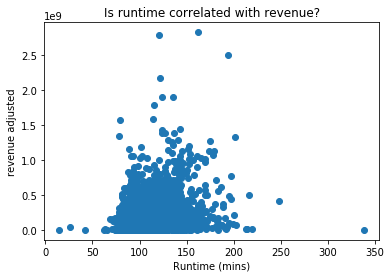

In [55]:
plot_scatter_adj(df_rev)
plt.show()

Hmm, not so clear. Could be because there's a big range in revenue in this dataset. Let's try with a log scale on the y axis.

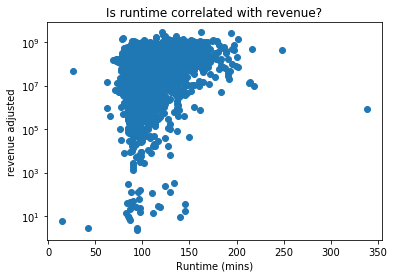

In [56]:
plot_scatter_adj(df_rev)
plt.yscale("log")
plt.show()

Again, not clear. Seems that a lot of movies are around the 80-175 minute mark. Let's take one last look by reducing the range of interest. Also, while we're doing it, let's try only looking at movies that made at least $100,000

In [57]:
df_rev_adj = df_rev.query('runtime >= 80 and runtime <= 175 and revenue_adj >= 100000')

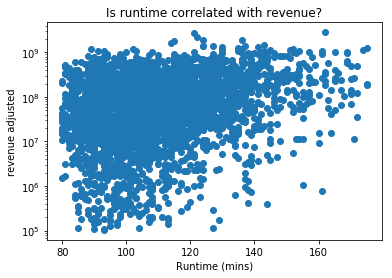

In [58]:
plot_scatter_adj(df_rev_adj)
plt.yscale("log")
plt.show()

Nah, I don't see it. There may be a very weak positive correlation but it's not clear. I'll just run the statistical test out of curiosity but it seems that runtime and revenue aren't strongly correlated. Although I can imagine that longer movies cost more so that might naturally lead to more revenue since bigger budgets come from larger studios which tend to make big blockbusters. Let's plot runtime vs. budget out of curiosity too.

In [59]:
from scipy.stats.stats import pearsonr
# Returns a tuple with (Pearson's correlation coefficient, 2-tailed p-value)
# Correlation coefficient between -1 and +1 where 0 is no correlation, +1 is perfect positive correlation
# and -1 is perfect negative correlation
pearsonr(df_rev_adj['runtime'], df_rev_adj['revenue_adj'])

(0.28623398889001084, 2.7900527626608778e-70)

Yup, seems weekly positively correlated. 

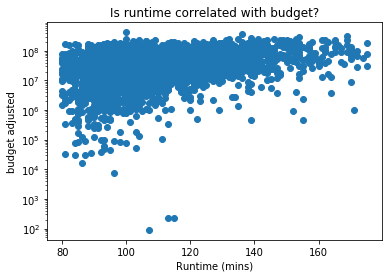

In [60]:
plot_scatter_adj(df_rev_adj, 'budget')
plt.yscale("log")
plt.show()

Let's remove those outliers

In [61]:
df_budg_adj = df_rev_adj.query('budget_adj >= 100000')

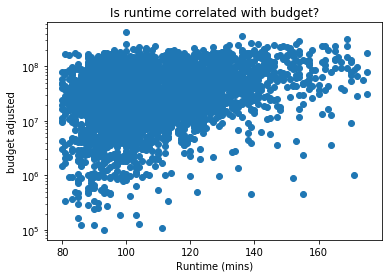

In [62]:
plot_scatter_adj(df_budg_adj, 'budget')
plt.yscale("log")
plt.show()

Still no obvious correlation. Nothing to see here. I think the problem probably comes from the fact that the runtimes, revenues and budgets are not normally distributed.  Let's check the histograms 

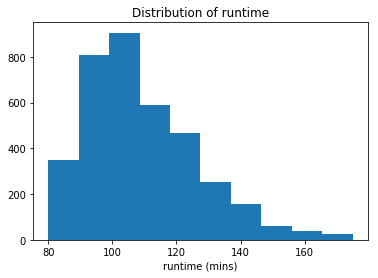

In [63]:
plt.hist(df_budg_adj['runtime'])
plt.xlabel("runtime (mins)")
plt.title("Distribution of runtime");

Yeah this is a bit left skewed. Most movies are around 100-120 minutes with a few really long movies over 150mins

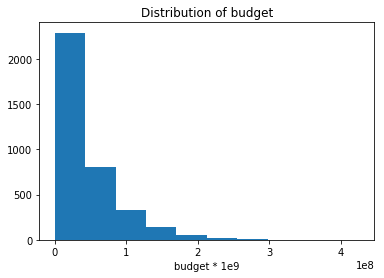

In [64]:
plt.hist(df_budg_adj['budget_adj'])
plt.xlabel("budget * 1e9")
plt.title("Distribution of budget");

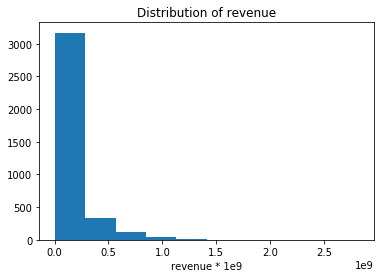

In [65]:
plt.hist(df_rev_adj['revenue_adj'])
plt.xlabel("revenue * 1e9")
plt.title("Distribution of revenue");

Wow. Revenue is really right skewed, as is budget. Must be why it's so hard to see 

<a id='conclusions'></a>
## Conclusions

So I initially wanted to know which Chris Pratt movie brought in the most revenue and it turns out to be Jurassic World. It made around 95% more than the next highest which was Guardians of the Galaxy.

I also wanted to see if runtime was correlated with revenue. Turns out that there is only a very weak positive correlation between revenue and runtime. I dug a bit deeper into the relationship between runtime and budget, with the hypothesis that longer movies require more money to make, but again found a weak correlation. 
I think the main issue is that the budget/revenue distributions are very right-skewed so it's difficult to find discrepancies between them. Similarly, most movies are between 80-120 mins so it's not likely that bigger budget movies would just keep getting longer and longer. There's a cap and a minimum for big budget movies (they're not going to make a 60min nor a 300min movie).

If I had to do it again, I would probably look at revenue vs. reviews but I think that's what most people would have looked at so I wanted to try something different

<a id='limitations'></a>
## Limitations

I don't split my analysis of runtime vs. revenue/budget into groups which is potentially why there is no obvious correlation. I group together both small studios and large, with varying budgets/revenues. I only look at movies with a revenue/budget over $100K, and maybe I would have seen a correlation in the low-budget/revenue movies.

I remove all movies with a revenue/budget of $0 and with a production/cast which is missing, without looking more closely at why they have these extreme values.

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0